# Исследование объявлений о продаже квартир

В распоряжении имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача -- установить параметры для построения автоматизированной системы отслеживающей аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Обзор данных. 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from math import floor

In [1]:
data = ... # по просьбе Яндекс Практикума датасет открыто не распространяется

display(data.info())

display(data.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Данные состоят из таблицы с 23699 строками и следующими столбцами:
-     `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
-    `balcony` — число балконов
-    `ceiling_height` — высота потолков (м)
-    `cityCenters_nearest` — расстояние до центра города (м)
-    `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
-    `first_day_exposition` — дата публикации
-    `floor` — этаж
-    `floors_total` — всего этажей в доме
-    `is_apartment` — апартаменты (булев тип)
-    `kitchen_area` — площадь кухни в квадратных метрах (м²)
-    `last_price` — цена на момент снятия с публикации
-    `living_area` — жилая площадь в квадратных метрах (м²)
-    `locality_name` — название населённого пункта
-    `open_plan` — свободная планировка (булев тип)
-    `parks_around3000` — число парков в радиусе 3 км
-    `parks_nearest` — расстояние до ближайшего парка (м)
-    `ponds_around3000` — число водоёмов в радиусе 3 км
-    `ponds_nearest` — расстояние до ближайшего водоёма (м)
-    `rooms` — число комнат
-    `studio` — квартира-студия (булев тип)
-    `total_area` — общая площадь квартиры в квадратных метрах (м²)
-    `total_images` — число фотографий квартиры в объявлении

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>],
       [<AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

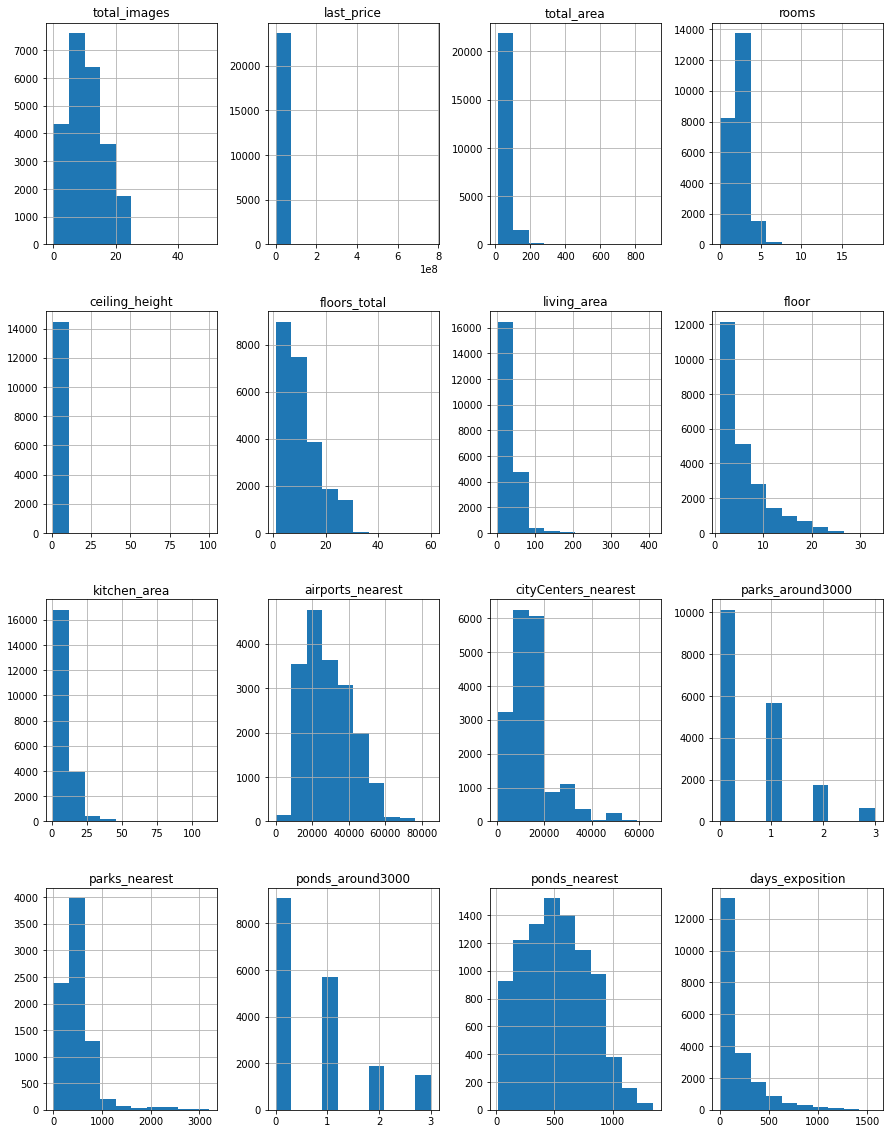

In [2]:
data.hist([
    'total_images', 
    'last_price', 
    'total_area',
    'rooms',
    'ceiling_height',
    'floors_total',
    'living_area',
    'floor',
    'kitchen_area',
    'airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    'days_exposition'
] ,figsize=(15, 20))

### Предобработка данных

In [3]:
print('Число пропусков в столбцах')
print(data.isna().sum())
display(data.info())

#display(data.describe())

Число пропусков в столбцах
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-n

None

В данных присутствуют пропуски в столбцах:
-    `is_apartment`
-    `balcony`
-    `parks_around3000`
-    `ponds_around3000`

-    `ceiling_height`
-    `floors_total`
-    `living_area`
-    `kitchen_area`
-    `days_exposition`

-    `locality_name`
-    `airports_nearest`
-    `cityCenters_nearest`
-    `parks_nearest`
-    `ponds_nearest`

Логично предположить, что пропуски в столбцах `is_apartment`, `balcony`, `parks_around3000`, `ponds_around3000` означают значение `0` (или `False`)

Пропусков в столбце `floors_total` мало (86) и можно безболезненно заменить их на медианные значения.

Рассмотрим корреляцию данных в столбцах `living_area`, `kitchen_area` с общей площадью квартиры и, если она сильна, восстановим пропуски в них через значения `total_area`.

Вполне очевидно, что высокие потолки привилегия дорогих квартир (дополнительно проверим это), поэтому можно разбить квартиры на медианные квартили по цене и заполнить пропуски в `ceiling_height` медианными значениями для каждого квартиля.

С пропусками в остальных столбцах (`locality_name`,`airports_nearest`,`cityCenters_nearest`,`parks_nearest`,`ponds_nearest`) особо ничего не сделать. С `locality_name` все очевидно. В столбцах `parks_nearest`,`ponds_nearest` пропусков более 3/4 и т.к. неизвестно насколько репрезентативны имеющиеся значения относительно общей выборки, восстановить данные корректно невозможно. В столбцах `airports_nearest`,`cityCenters_nearest`пропусков меньше (1/4) но т.к. также неизвестна репрезентатитвность выборки также проблематично заполнить пропуски.

Плотность распределения `days_exposition` не имеет явного центра и монотонно убывает с ростом срока продажи, сложно предложить модель которой можно заполнить пропуски для такого распределения, поэтому оставим все как есть.

Большая часть пропусков по-видимому вызвана ошибками при автоматической подгрузке данных о квартире из открытых источников (этажность, расстояние до инфраструктуры и прочее). Пропуски в числе балконов, статусе апартаментов вероятнее всего вызваны людьми, для человека пустое поле и значение 0 могут казаться одним и тем же.

In [4]:
#data.loc[data['balcony'].isna(), 'balcony'] = False
#data.loc[data['is_apartment'].isna(), 'is_apartment'] = 0
#data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0
#data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0

data['balcony'].fillna(False, inplace=True)
data['is_apartment'].fillna(0, inplace=True)
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

data['floors_total'].fillna(data['floors_total'].median(), inplace=True)

q1 = data['last_price'].quantile(0.25)
q2 = data['last_price'].quantile(0.50)
q3 = data['last_price'].quantile(0.75)

def price_qurtiles(price):
    if price < q1:
        return 0
    if price < q2:
        return 1
    if price < q3:
        return 2
    else:
        return 3
    
data['price_quartile'] = data['last_price'].apply(price_qurtiles)

for q in range(0,4):
    median_value = data[data['price_quartile']==q]['ceiling_height'].median()
    data.loc[(data['price_quartile']==q)&(data['ceiling_height'].isna()), 'ceiling_height'] = median_value

display(data.pivot_table(index='price_quartile', values='ceiling_height', aggfunc=[ 'median']))
print('Для разных ценовых категорий действительно разная медианная высота потолка')
    
print('Корреляция жилой площади и общей площади:', data['living_area'].corr(data['total_area']))
print('Корреляция площади кухни и общей площади:', data['kitchen_area'].corr(data['total_area']))
print('Корреляция сильная')

print('Средняя доля жилой площади от общей:', (data['living_area']/data['total_area']).mean())
print('Средняя доля площади кухни от общей:', (data['kitchen_area']/data['total_area']).mean())

data['living_area'].fillna(data['total_area']*(data['living_area']/data['total_area']).mean(), inplace=True)
data['kitchen_area'].fillna(data['total_area']*(data['kitchen_area']/data['total_area']).mean(), inplace=True)

print(data.isna().sum())

,median
,ceiling_height
price_quartile,
0,2.55
1,2.60
2,2.65
3,2.90


Для разных ценовых категорий действительно разная медианная высота потолка
Корреляция жилой площади и общей площади: 0.9395373338721493
Корреляция площади кухни и общей площади: 0.6091211711198318
Корреляция сильная
Средняя доля жилой площади от общей: 0.5647655216993234
Средняя доля площади кухни от общей: 0.1873547387717406
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
price_quarti

Рассмотрим типы данных в таблице.

`locality_name`, `first_day_exposition` и `is_apartment` имеют строковый тип. Разумно будет привести `first_day_exposition` к типу `datetime`, а `is_apartment`, `balcony` к булевому типу.

Значения в столбцах `last_price`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` являются достаточно большими и десятичная точность им ни к чему и можно привести их к целому типу.

Для значений столбцов `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition` вещественные значения не имеют смысла и поэтому их также приведем к целым.

In [5]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('bool')
data['last_price'] = data['last_price'].astype('int')
#data['airports_nearest'] = data['airports_nearest'].astype('int')
#data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
#data['parks_nearest'] = data['parks_nearest'].astype('int')
#data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
#data['days_exposition'] = data['days_exposition'].astype('int')
data.loc[(~data['days_exposition'].isna()), 'days_exposition'] = data.loc[(~data['days_exposition'].isna()), 'days_exposition'].astype('int')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_quartile
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,False,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,3
1,7,3350000,40.4,2018-12-04,1,2.55,11,18.600000,1,False,...,True,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,False,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2
3,0,64900000,159.0,2015-07-24,3,2.90,14,89.797718,9,False,...,False,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,3
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,False,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,3


Рассмотрим названия населенных пунктов и проверим их на наличие неявных дубликатов

In [6]:
for i in data['locality_name'].sort_values().unique():
    print(i)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

В данных встречаются дубликаты по типу `Мурино`, `поселок Мурино`, `посёлок Мурино`. Простейший способ избавиться от них - удалить тип населенного пункта и оставить только название.

In [7]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['коттеджный поселок ','городской поселок ', 'поселок станции ', 'поселок городского типа ', 'поселок ',  'деревня ', 'село ', 'садовое товарищество ', 'садоводческое некоммерческое товарищество '], '', regex=True)
) 

for i in data['locality_name'].sort_values().unique():
    print(i)

Агалатово
Александровская
Алексеевка
Аннино
Аро
Барышево
Батово
Бегуницы
Белогорка
Белоостров
Бокситогорск
Большая Вруда
Большая Ижора
Большая Пустомержа
Большие Колпаны
Большое Рейзино
Большой Сабск
Бор
Борисова Грива
Бугры
Будогощь
Ваганово
Важины
Вартемяги
Вахнова Кара
Вещево
Виллози
Вознесенье
Возрождение
Войсковицы
Войскорово
Володарское
Волосово
Волхов
Всеволожск
Выборг
Вырица
Выскатка
Высокоключевой
Высоцк
Гаврилово
Гарболово
Гатчина
Гладкое
Глажево
Глебычево
Глинка
Гончарово
Горбунки
Гостилицы
Громово
Дзержинского
Дружная Горка
Дружноселье
Дубровка
Елизаветино
Ефимовский
Жилгородок
Жилпоселок
Житково
Заводской
Заклинье
Заневка
Запорожское
Зеленогорск
Зимитицы
Ивангород
Извара
Ильичево
Иссад
Калитино
Каложицы
Кальтино
Каменногорск
Камышовка
Каськово
Келози
Кивеннапа Север
Кикерино
Кингисепп
Кингисеппский
Кипень
Кириши
Кировск
Кирпичное
Кисельня
Кобралово
Кобринское
Колпино
Колтуши
Коммунар
Коммунары
Кондратьево
Копорье
Коркино
Корнево
Коробицыно
Котельский
Котлы
Красная Долина
К

### Добавление в таблицу новых столбцов

Добавим в таблицу следующие столбцы:
- цена за квадратный метр
- день недели выставления объявления
- месяц выставления объявления
- год выставления объявления

In [8]:
data['price_per_meter'] = round(data['last_price'] / data['total_area'],2)

data['week_day'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

def floor_type(row):
    #print(row)
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

data['km_to_center'] = round(data['cityCenters_nearest'] / 1000,0)

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_quartile,price_per_meter,week_day,month_exposition,year_exposition,floor_type,km_to_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,3,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.55,11,18.600000,1,False,...,0,NaN,81.0,0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558.0,2,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.90,14,89.797718,9,False,...,3,234.0,424.0,3,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,3,100000.00,1,6,2018,другой,8.0


### Исследовательский анализ данных

#### Распределения данных и аномальные значения

Рассмотрим распределения различных параметров в данных, по возможности отфильтруем аномальные значения

##### Общая площадь

Минимальная общая площадь квартиры составляет 12 квадратных метров а максимальная - 900. Назвать эти величины выбросами сложно, т.к. такие квартиры действительно существуют, но они крайне малочисленны. Для того чтобы не вносить искажения в статистику будем рассматривать только помещения с площадью менее 300 квадратных метров. 

Также отбросим все квартиры:
- общей площадью менее 28м^2
- жилой площадью менее 14м^2
- кухней менее 5м^2

как недопустимые согласно СП 54.13330.2016.

В итоге получаем, что медианая общая площадь квартиры составляет 52м^2, и квартиры менее 70м^2 составляют 75% от общего числа квартир.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

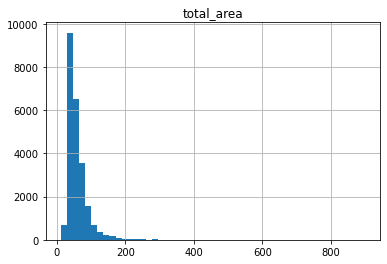

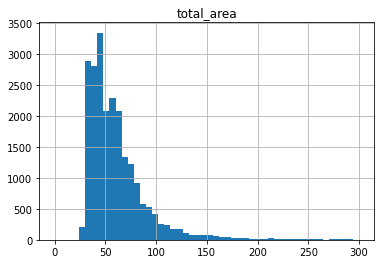

In [9]:
data.hist('total_area', bins=50)
print(data['total_area'].describe())

data_filtered = data.query('total_area<300 and total_area>28 and living_area>14 and kitchen_area>5')
data_filtered.hist('total_area', bins=50, range=(0,300))

##### Жилая площадь

Аналогично отбросим все помещения с жилой площадью более 250 квадратных метров как крайне малочисленные
 
В данных наблюдаетя явный провал: квартир с жилой площадью около 25м^2 несколько меньше чем с немного большей или меньшей площадью. Заметим также, что небольшой провал есть и в общей площади квартир (около 50м^2) и вероятнее всего они связаны между собой

Неизвестно чем вызвана подобная аномалия: ошибками в данных или это реальный феномен. Возможно это как-то связано с тенденцией уменьшения площади квартир в новых домах, в то время как в старом фонде площади заметно больше. Эти две группы могут иметь свои характерные площади. Проверить это предположение не представляется возможным из-за отсутствия данных о годе постройки.

По гистограмме видно, что квартиры малой площади (жилая площадь до 43м^2) составляют более 75% от общего числа квартир.

count    22421.000000
mean        34.847281
std         19.819658
min         14.010000
25%         19.800000
50%         30.500000
75%         42.800000
max        250.000000
Name: living_area, dtype: float64


array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

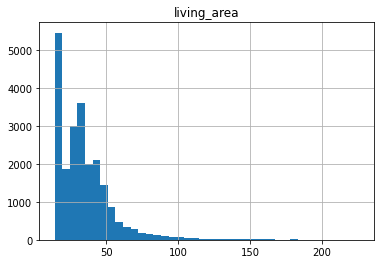

In [10]:
print(data_filtered['living_area'].describe())

data_filtered = data_filtered.query('living_area<250')
data_filtered.hist('living_area', bins=40)

##### Площадь кухни

Рассмотрим гистограмму по площадям кухни, как видно, для большинства квартир ее площадь не превышает 12м^2, а медианное значение около 9м^2

Отбросим квартиры с площадью кухни более 50м^2 как малочисленные.

count    22420.000000
mean        10.653459
std          5.694891
min          5.040000
25%          7.200000
50%          9.300000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

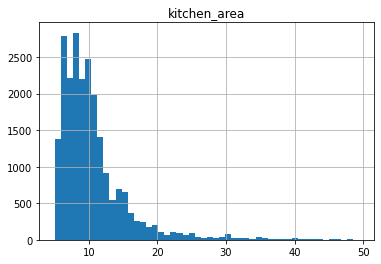

In [11]:
print(data_filtered['kitchen_area'].describe())

data_filtered = data_filtered.query('kitchen_area<50')

data_filtered.hist('kitchen_area', bins=50)

##### Цена объекта

Отбросим элитные квартиры (более 50 миллионов рублей) ввиду их малочисленности

В данных есть одна квартира с ценой 12000 рублей, это значение явно аномальное

Медианная стоимость квартиры равна 4.7 миллионов рублей, и большинство квартир стоят от 3.4 до 6.8 миллионов.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

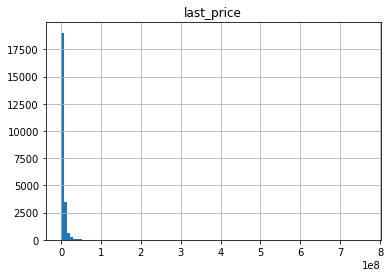

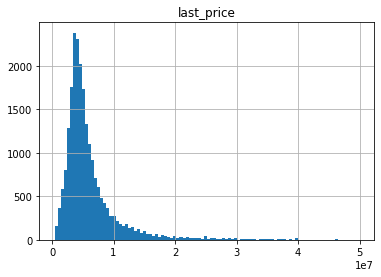

In [12]:
print(data['last_price'].describe())

data_filtered = data_filtered.query('last_price<50000000 and last_price>13000')

data.hist('last_price', bins=100)
data_filtered.hist('last_price', bins=100)

#print(data_filtered['last_price'].describe())

##### Количество комнат

Отбросим квартиры более чем с 8 комнатами в виду их малочисленности.

В данных есть некоторое количество квартир с числом комнат 0, но при этом это никак не связано с тем что они могут студииями или иметь свободную планировку. Отбросим их.

В итоге получаем что самыми популярными являются двушки и однушки, после них идут 3 комнатные. Больше 3 комнат имеют только 7% квартир.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

0 комнат, студия: 38
0 комнат, не студия: 17
0 комнат, свободная планировка: 17
0 комнат, не свободная планировка: 38

Больше 3 комнат: 6.934881418478016%


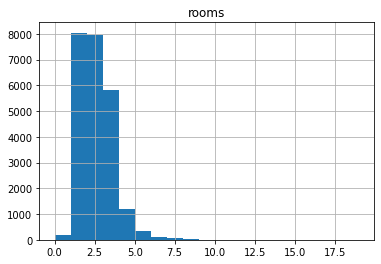

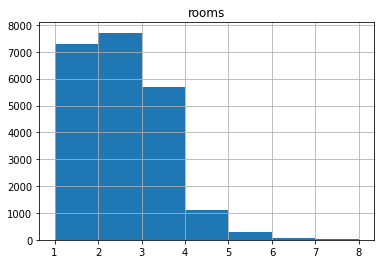

In [13]:
print(data['rooms'].describe())
print()
print('0 комнат, студия:', data_filtered.query('rooms==0 and studio')['rooms'].count())
print('0 комнат, не студия:', data_filtered.query('rooms==0 and not studio')['rooms'].count())
print('0 комнат, свободная планировка:', data_filtered.query('rooms==0 and open_plan')['rooms'].count())
print('0 комнат, не свободная планировка:', data_filtered.query('rooms==0 and not open_plan')['rooms'].count())

data.hist('rooms', bins=19)

data_filtered = data_filtered.query('rooms<=8 and rooms>=1')

data_filtered.hist('rooms', bins=7)

print()
print(f'Больше 3 комнат: {data_filtered.query("rooms>3")["rooms"].count()/data_filtered["rooms"].count()*100}%')

##### Высота потолков

СНиП регламентирует минимальную высоту потолка 2.5м для жилых и 2.1м для коридоров и холлов. Очевидно что все значения менее 2.1м будут в таком случае аномальными.

Можно предположить, что значения 32, 27.5, 27 завышены в 10 раз из-за смещения десятичного разделителя, однако как трактовать значения 14, 20 непонятно. Такая высота слишком большая чтобы быть правдоподобной, но и не может быть завышена в 10 раз т.к. тогда она станет слишком маленькой.

Предлагается отбросить все значения менее 2.1, значения в диапазоне (20,60] считаются завышенными и делятся на 10. После нормировки все значения более 6м отбрасываются

В итоге получаем, что в большинстве квартир потолки около 2.6-2.8 метра и с ростом высоты потолков число квартир падает.

count    23699.000000
mean         2.728916
std          0.991281
min          1.000000
25%          2.550000
50%          2.600000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

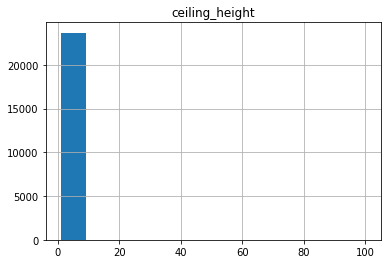

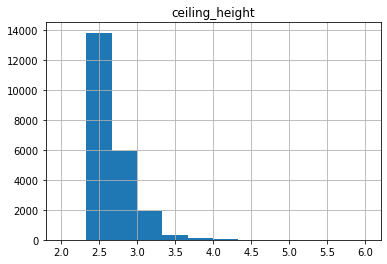

In [14]:
print(data['ceiling_height'].describe())

#print(sorted(data_filtered['ceiling_height'].unique()))
data.hist('ceiling_height', bins=12)

data_filtered = data_filtered.query('ceiling_height >=2.1')
data_filtered.loc[(data_filtered['ceiling_height']>20)&(data_filtered['ceiling_height']<=60),'ceiling_height'] = data_filtered.loc[(data_filtered['ceiling_height']>20)&(data_filtered['ceiling_height']<=60),'ceiling_height']/10
data_filtered = data_filtered.query('ceiling_height < 6')

#print(sorted(data_filtered['ceiling_height'].unique()))
data_filtered.hist('ceiling_height', bins=12, range=(2,6))

##### Общее число этажей

Рассмотрим общее число этажей в домах. Как видно из гистограмм самыми массовыми являются 5 и 9 этажки, а большинстов домов имеет от 5 до 16 этажей. Медианным числом этажей является 9, а средним 10.7

count    22200.000000
mean        10.643784
std          6.505166
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

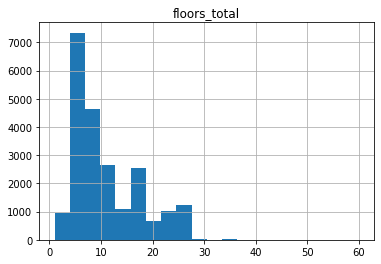

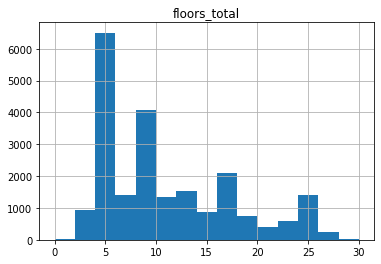

In [15]:
print(data_filtered['floors_total'].describe())

data_filtered.hist('floors_total', bins=20)

data_filtered.hist('floors_total', bins=15, range=(0,30))

##### Тип этажа

Данные по типу этажей на которых находятся квартиры выглядят правдоподобно: первых и последних этажей примерно поровну, а других больше всего.

По проценту `P` числа квартир на этажах отличных от первого и последнего можно оценить среднее число этажей в доме `N`: `P=(N-2)/N`. В данном случае получаем `N=7.7`, что заметно отличается от среднего числа этажей из столбца `floors_total`: 10.7. Это может быть вызвано тем, что не во всех домах первые и последние этажи являются жилыми.

count      22200
unique         3
top       другой
freq       16398
Name: floor_type, dtype: object


<AxesSubplot:>

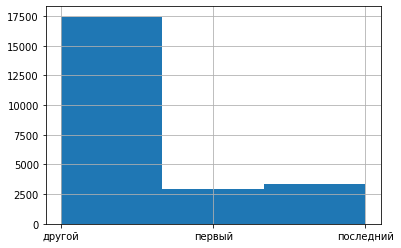

In [16]:
print(data_filtered['floor_type'].describe())

data['floor_type'].hist(bins=3)

##### Расстояние до центра города (м)

Рассмотрим как распределено число квартир в зависимости от расстояния до центра Санкт-Петербурга.
По гистограмме видно что есть 4 пика числа квартир: 5, 13, 30 и 50км до центра города, причем больше всего квартир на расстоянии около 13км от центра.

Вероятнее всего пики связаны с густонаселенными районами города или крупными населенными пунктами.

Заметим также что расстояние до центра известно лишь для 3/4 от всех данных.

count    17158.000000
mean     14169.334946
std       8491.598653
min        181.000000
25%       9386.000000
50%      13107.000000
75%      16228.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

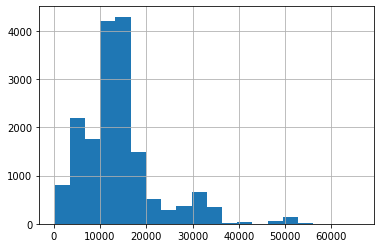

In [17]:
print(data_filtered['cityCenters_nearest'].describe())

data_filtered['cityCenters_nearest'].hist(bins=20)

##### Расстояние до ближайшего парка (м)

Рассмотрим как распределено число квартир в зависимости от расстояния до ближайшего парка.

По гистограмме видно что около 800 квартир имее парк в непосредствнной близости, а большинство квартир имеет парк в полукилометре.

Менее 5% квартир имеют парк дальше чем 1км.

Не имеет смысла уделять большое внимание на этот параметр т.к. для почти 3/4 таблицы он неизвестен.

count    7605.000000
mean      492.235897
std       342.455508
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Парк дальше 1км: 4.667981591058514%


array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

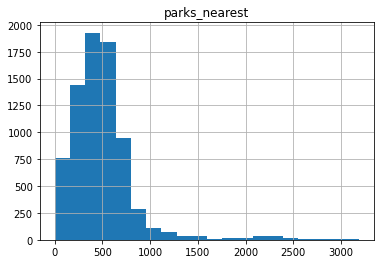

In [18]:
print(data_filtered['parks_nearest'].describe())
print()
print(f"Парк дальше 1км: {100*data_filtered.loc[data_filtered['parks_nearest']>1000,'parks_nearest'].count()/data_filtered['parks_nearest'].count()}%")

data_filtered.hist('parks_nearest',bins=20)

##### Расстояние до ближайшего пруда (м)

Аналогично числу парков данный параметр неизвестен для 3/4 таблицы.

Большинство квартир (для которых этот параметр известен) имеет пруд менее чем в 1км.

count    8501.000000
mean      519.570521
std       277.115559
min        13.000000
25%       297.000000
50%       503.000000
75%       731.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

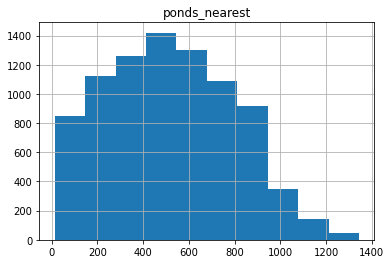

In [19]:
print(data_filtered['ponds_nearest'].describe())

data_filtered.hist('ponds_nearest',bins=10)

##### Расстояние до ближайшего аэропорта (м)

Рассмотрим как распределено число квартир в зависимости от расстояния до ближайшего аэропорта.

Минимальное расстояние до аэропорта 0м, это значение явно является аномальным, удалим данные для которых это расстояние менее 500м.

Для большинства квартир аэропорт находится в 10-50км, медианное расстояние - 27км.

count    17137.000000
mean     28852.479722
std      12590.980284
min          0.000000
25%      18590.000000
50%      26880.000000
75%      37347.000000
max      84869.000000
Name: airports_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

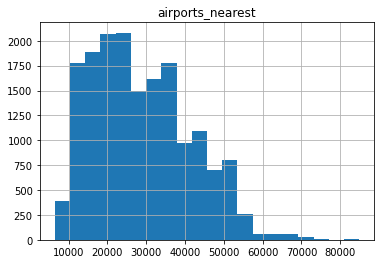

In [20]:
print(data_filtered['airports_nearest'].describe())

data_filtered = data_filtered.query('airports_nearest >= 500')

data_filtered.hist('airports_nearest',bins=20)

#### Исследование длительности продажи

Рассмотрим длительность продажи квартир по отфильтрованным от аномалий данным. Для этого рассмотрим соответствующую гистограмму

Медианное время продажи квартиры 96 дней, а среднее время продажи - 182 дня.

Лишь 15% квартир продаются более года.

При рассмотрении гистограммы с большим количеством корзин можно заменить высокие узкие аномальные пики.

Будем считать, продажу аномально быстрой, если она произошла за менее чем Q1=44 дня, и, аналогично, назовем продажу аномально длинной если она произошла более чем за Q3=232 дня. Здесь Q1 и Q3 первый и третий квартили соответственно. Можно было бы брать интервал нормальных продаж шире: на 1.5 межквартильных размаха больше с каждой стороны, но в таком случае аномально быстрых продаж не было бы (левый край интервала был бы отрицательным). 

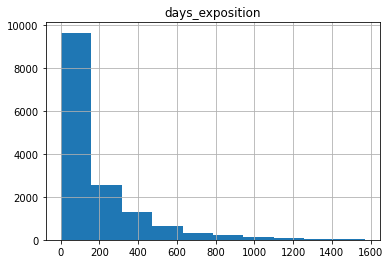

count    14934.000000
mean       182.810031
std        223.652867
min          1.000000
25%         44.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64

Продавались больше 100 дней: 14.992634257399223


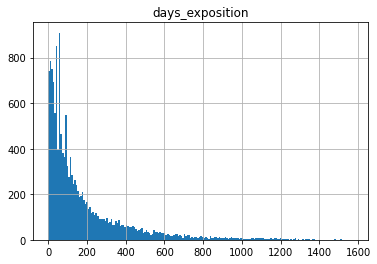

In [21]:
data_filtered.hist('days_exposition',bins=10)
plt.show()
data_filtered.hist('days_exposition',bins=200)

#data_filtered.boxplot()

print(data_filtered['days_exposition'].describe())
print()
print('Продавались больше 100 дней:', data_filtered.loc[data_filtered['days_exposition']>365,'days_exposition'].count()/data_filtered['days_exposition'].count()*100)

#### Зависимость цены от различных факторов

Рассмотрим как зависит цена квартиры от:
- общей площади
- жилой площади
- площади кухни

Коэфициент корреляции цены и total_area : 0.795357491507867


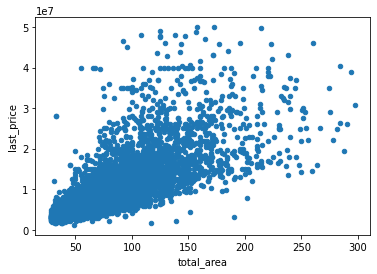

Коэфициент корреляции цены и living_area : 0.7040231390620576


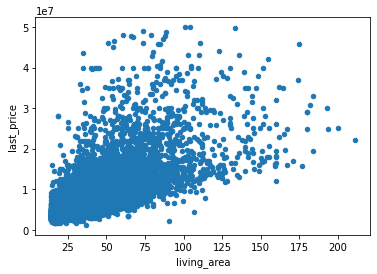

Коэфициент корреляции цены и kitchen_area : 0.6216447340800912


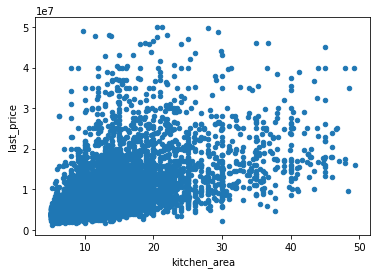

In [22]:
params = ['total_area', 'living_area', 'kitchen_area']#, 'floor_type', 'first_day_exposition']

for p in params:
    data_filtered.plot(x=p, y='last_price', kind='scatter')
    #data_filtered.plot(x=p, y='last_price', kind='hexbin', gridsize=20, sharex=False)
    print('Коэфициент корреляции цены и',p,':', data_filtered[p].corr(data_filtered['last_price']))
    plt.show()

Из диаграмм рассеяния и коэффициентов корреляции пулучаем:
- цена квартиры сильно прямо пропорционально зависит от ее общей площади, немного слабее от жилой площади и еще немного слабее от площади кухни

Заметим также что для квартир стоимостью более 20 миллионов рублей рассеяние сильно больше чем для более дешевых. Рассмотрим те же диграммы для квартир дешевле 20 миллионов

Коэфициент корреляции цены и total_area : 0.8117600049578623


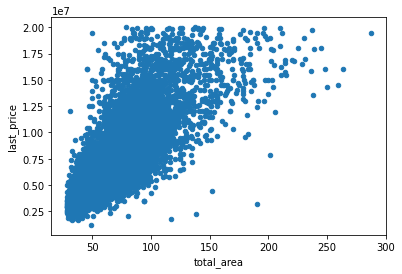

Коэфициент корреляции цены и living_area : 0.710309267158036


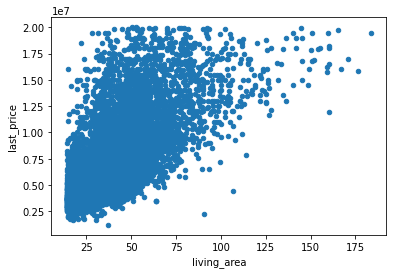

Коэфициент корреляции цены и kitchen_area : 0.6240218775136112


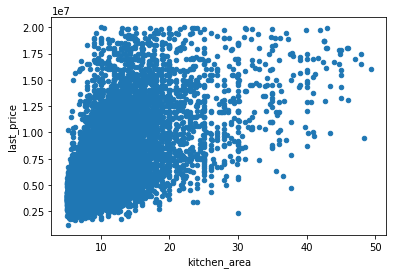

In [23]:
params = ['total_area', 'living_area', 'kitchen_area']#, 'floor_type', 'first_day_exposition']

data_filtered_less_20m = data_filtered.query('last_price<20000000')

for p in params:
    data_filtered_less_20m.plot(x=p, y='last_price', kind='scatter')
    #data_filtered.plot(x=p, y='last_price', kind='hexbin', gridsize=20, sharex=False)
    print('Коэфициент корреляции цены и',p,':', data_filtered_less_20m[p].corr(data_filtered_less_20m['last_price']))
    plt.show()

Для квартир дешевле 20 миллионов все зависимости остались прежними но корреляции стали немного сильнее (коэфициенты корреляции увеличились на несколько сотых)

Теперь рассмотрим те же параметры в зависимости от цены 1м^2

Коэфициент корреляции цены за 1м^2 и total_area : -0.0034375421902282607


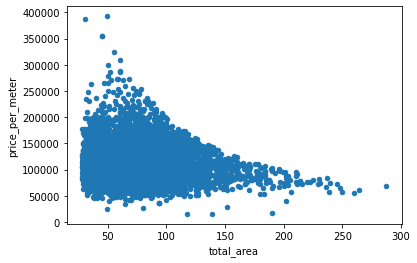

Коэфициент корреляции цены за 1м^2 и living_area : -0.08859372508574517


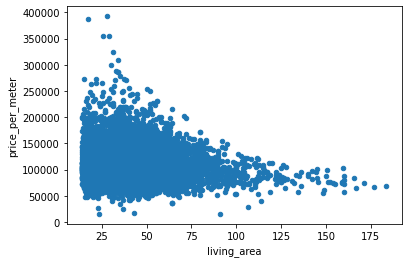

Коэфициент корреляции цены за 1м^2 и kitchen_area : 0.2456516804552437


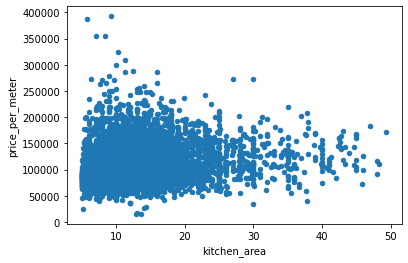

In [24]:
params = ['total_area', 'living_area', 'kitchen_area']#, 'floor_type', 'first_day_exposition']

#data_filtered_less_20m = data_filtered.query('last_price<20000000')

for p in params:
    data_filtered_less_20m.plot(x=p, y='price_per_meter', kind='scatter')
    #data_filtered.plot(x=p, y='last_price', kind='hexbin', gridsize=20, sharex=False)
    print('Коэфициент корреляции цены за 1м^2 и',p,':', data_filtered_less_20m[p].corr(data_filtered_less_20m['price_per_meter']))
    plt.show()

В данном случае получаем:
- большая кухня немного (коэффициент корреляции 0.25) увеличивает цену квадратного метра
- цена квадратного метра почти никак не зависит от общей и жилой площади

Теперь рассмотрим как меняется цена квартиры в зависимости от:
- типа этажа, на котором расположена квартира (первый, последний, другой)
- количества комнат
- даты размещения (день недели, месяц, год).

In [25]:
params = ['year_exposition', 'month_exposition', 'week_day', 'floor_type', 'rooms']

for p in params:
    #data_filtered.plot(x=p, y='last_price', kind='scatter')
    #data_filtered.plot(x=p, y='last_price', kind='hexbin', gridsize=20, sharex=False)
    #print('Коэфициент корреляции цены и',p,':', data_filtered[p].corr(data_filtered['last_price']))
    #plt.show()
    
    display(data_filtered.pivot_table(index=p, values='last_price', aggfunc=['mean', 'count']))

,mean,count
,last_price,last_price
year_exposition,,
2014,1.199663e+07,111
2015,7.983760e+06,915
2016,6.956043e+06,2065
2017,6.721211e+06,6060
2018,6.713482e+06,5898
2019,7.236148e+06,2087


,mean,count
,last_price,last_price
month_exposition,,
1,7.088557e+06,1071
2,6.886612e+06,1899
3,6.879805e+06,1824
4,6.858414e+06,1740
5,6.762195e+06,947
6,6.749070e+06,1281
7,6.902058e+06,1232
8,6.900532e+06,1281


,mean,count
,last_price,last_price
week_day,,
0,6.950270e+06,2602
1,6.901100e+06,3048
2,7.020195e+06,2879
3,7.138014e+06,3109
4,6.712896e+06,2918
5,6.706030e+06,1357
6,6.720190e+06,1223


,mean,count
,last_price,last_price
floor_type,,
другой,7.030841e+06,13104
первый,5.680696e+06,1866
последний,7.247074e+06,2166


,mean,count
,last_price,last_price
rooms,,
1,4.321802e+06,5393
2,6.380768e+06,5760
3,8.635602e+06,4592
4,1.194905e+07,1002
5,1.650795e+07,264
6,1.853277e+07,81
7,2.000789e+07,38
8,2.026667e+07,6


Получаем, что в 2015 цены стали заметно ниже по сравнению с 2014 (более чем на 30%: с 12 до 8 млн.р.) и понемногу снижались до 2019, когда произошел рост на 7% (с 6.7 до 7.2 млн.р.)

В течение одного года цена меняется не более чем на 8%, причем она минимальна в октябре мае и июне и максимальна в декабре.

Также цена колеблется и в течение одной недели: минимальна в пятницу (6.7 млн.р.) и возрастает вплоть до максимума в четверг (7.1 млн.р.)

Самыми недорогими оказались квартиры на 1 этаже (в среднем 5.7 млн.р.), а квартиры на последнем этаже являются самыми дорогими, с небольшим отрывом от других этажей (7.2 против 7 млн.р.)

Самыми дешевыми и одними из самых массовых являются однушки (в среднем 4.2 млн.р.). Далее идут двушки (самые массовые; в среднем 6.4 млн.р.) и трешки (8.6 млн.р.). 

Рассмотрим все то же самое для квартир до 20 миллионов рублей.

In [26]:
params = ['year_exposition', 'month_exposition', 'week_day', 'floor_type']

for p in params:
    #data_filtered_less_20m.plot(x=p, y='last_price', kind='scatter')
    #data_filtered.plot(x=p, y='last_price', kind='hexbin', gridsize=20, sharex=False)
    #print('Коэфициент корреляции цены и',p,':', data_filtered_less_20m[p].corr(data_filtered_less_20m['last_price']))
    #plt.show()
    
    display(data_filtered.pivot_table(index=p, values='last_price', aggfunc=['mean']))

,mean
,last_price
year_exposition,
2014,1.199663e+07
2015,7.983760e+06
2016,6.956043e+06
2017,6.721211e+06
2018,6.713482e+06
2019,7.236148e+06


,mean
,last_price
month_exposition,
1,7.088557e+06
2,6.886612e+06
3,6.879805e+06
4,6.858414e+06
5,6.762195e+06
6,6.749070e+06
7,6.902058e+06
8,6.900532e+06


,mean
,last_price
week_day,
0,6.950270e+06
1,6.901100e+06
2,7.020195e+06
3,7.138014e+06
4,6.712896e+06
5,6.706030e+06
6,6.720190e+06


,mean
,last_price
floor_type,
другой,7.030841e+06
первый,5.680696e+06
последний,7.247074e+06


Для не элитных квартир корреляции остались неизменны.

#### Стоимость квадратного метра в различных населенных пунктах

Рассмотрим 10 населенных пунктов с самым большим числом объявлений о продаже и оценим стоимость квадратного метра в каждом из них

In [27]:
popular_cities = data_filtered.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean']).sort_values(by=('count','price_per_meter'), ascending=False).head(10)
popular_cities.columns = ['Число объявлений', 'Цена за м^2, руб.']
#popular_cities.style.highlight_between(left=popular_cities['Цена за м^2, руб.'].min(), right=popular_cities['Цена за м^2, руб.'].min())
popular_cities.style.highlight_max(subset='Цена за м^2, руб.').highlight_min(subset='Цена за м^2, руб.')

#display(popular_cities)

,Число объявлений,"Цена за м^2, руб."
locality_name,,
Санкт-Петербург,14815,111552.372238
Шушары,404,77190.274480
Пушкин,331,103695.352417
Колпино,321,75192.855327
Парголово,294,89204.044490
Петергоф,195,84821.733692
Сестрорецк,175,101772.570629
Красное Село,158,71992.727785
Ломоносов,111,72338.510270


Получили, что среди 10 населенных пунктов с самым большим числом объявлений самая высокая цена за м^2 в Санкт-Петербурге: 112т.р., а самая низкая в Красном Селе: 72т.р. То что самая высокая цена в самом городе - результат очевидный, но то что цена в Красном Селе минимальна несколько неожиданно, ведь это не самый удаленный район.

#### Зависимость цены квадратного метра в самом Санкт-Петербурге от расстояния до центра города

<AxesSubplot:xlabel='km_to_center'>

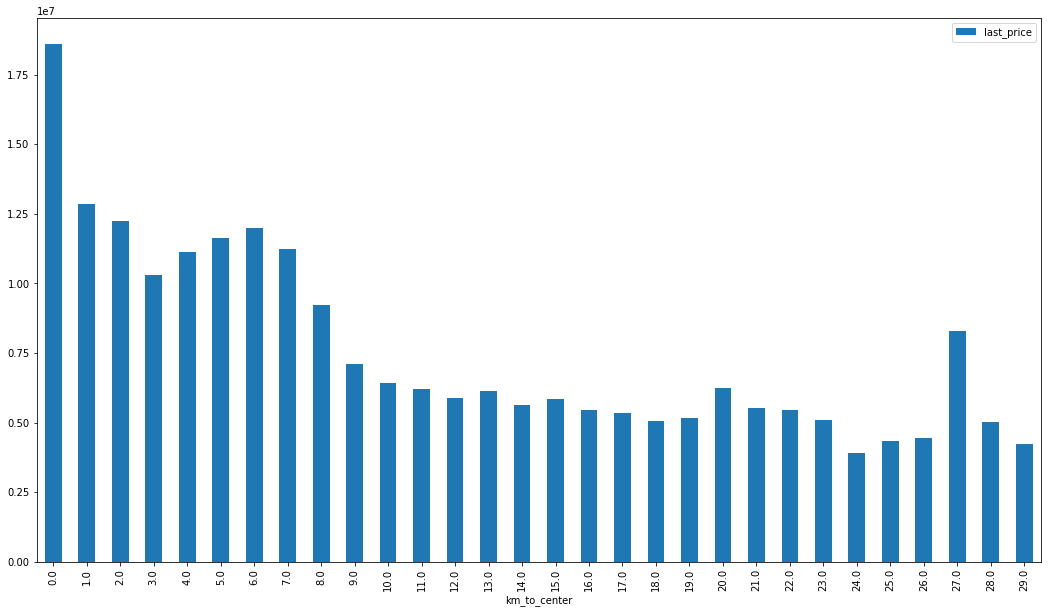

In [28]:
data_filtered_spb = data_filtered.query('locality_name == "Санкт-Петербург"')
data_filtered_spb['km_to_center'].apply(lambda x: floor(x))
#display(data_filtered_spb)

#data_filtered_spb.pivot_table(index='km_to_center', values='price_per_meter', aggfunc='mean').plot(figsize=(18,10), kind='bar')#style='o-')
data_filtered_spb.pivot_table(index='km_to_center', values='last_price', aggfunc='mean').plot(figsize=(18,10), kind='bar')#style='o-')

Как и ожидалось, цена квартир максимальна в центре города (18.6 млн.р.) и падает с удалением от него (до 4.2 млн.р. на расстоянии 29км). Однако есть два скачка цены: широкий на расстоянии 5-7 км от центра и узкий на расстоянии 27км.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_quartile,price_per_meter,week_day,month_exposition,year_exposition,floor_type,km_to_center
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0,NaN,128.0,3,193918.92,1,11,2017,другой,27.0
5961,6,2250000,32.0,2018-02-27,1,2.55,2,16.5,2,False,...,0,NaN,178.0,0,70312.50,1,2,2018,последний,27.0


<AxesSubplot:>

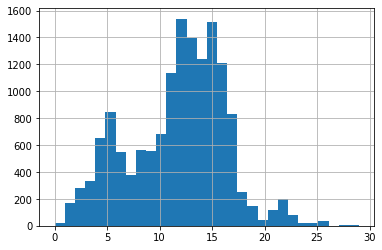

In [29]:
display(data_filtered_spb.query('km_to_center==27'))
data_filtered_spb['km_to_center'].hist(bins=30)

Заметим, что на расстоянии 27км от центра находится всего 2 квартиры и на такой малой выборке среднее не может дать достоверные значения.

Заметим также что квартир ближе 1км дальше 23км от центра достаточно мало и соответстующая средняя стоимость квадратного метра может быть не точна.

### Общий вывод

Были рассмотрены данные сервиса Яндекс.Недвижимость - набор объявлений о продаже квартир в Санкт-Петербурге и ЛО за 2014-2019 годы.
Данные были отфильтрованы от аномальных значений и негодных данных, также были отброжены крайне маочисленные группы квартир (крайне большой и малой цены и площади).

На основании рассмотренных данных были получены следующие результаты.

Самыми массовыми являются квартиры:
- от 3 до 7млн.р.
- общей площадью 30-70м^2 (жилая площадь до 40м^2)
- до 3 комнат (включительно)
- имеющие кухню до 10м^2
- потолок до 2.8м
- расположенные ближе 20км до центра

Медианное время продажи квартиры - 3 месяца. Число квартир проданных за определенный срок убывает практически экспоненциально с ростом длительности продажи. 

Интервал продажи (44, 232) дня называем нормальным и все продажи не укладывающиеся в него будем называть аномально долгими или быстрыми.

Цена квартиры сильно прямо пропорционально зависит от ее:
- общей площади
- жилой площади
- немного слабее от площади кухни

Подтверждено, что для дорогих кварит характерны высокие потолки

Самыми дешевыми и одними из самых массовых являются однушки (в среднем 4.2 млн.р.). Далее идут двушки (самые массовые; в среднем 6.4 млн.р.) и трешки (8.6 млн.р.). Квартир с большим числом комнат значительно меньше и в среднем они стоят от 11 млн. р.

В 2015 цены стали заметно ниже по сравнению с 2014 (более чем на 30%: с 12 до 8 млн.р.) и понемногу снижались вплоть до 2019, когда произошел рост на 7% (с 6.7 до 7.2 млн.р.)

Среди 10 населенных пунктов с самым большим числом объявлений самая высокая цена за м^2 в Санкт-Петербурге: 112т.р., а самая низкая в Красном Селе: 72т.р.

Самыми массовыми являются 5 и 9 этажки, а большинстов домов имеет от 5 до 16 этажей. Медианным числом этажей является 9, а средним 10.7

Как и ожидалось, цена квартир максимальна в центре города (18.6 млн.р.) и падает с удалением от него (до 4.2 млн.р. на расстоянии 29км), причем квартир близко к центру не так много, большинство квартир находится на расстоянии 10-20км от центра

Дополнительно имеет смысл рассмотреть следующее:
- влияние статуса апартаментов и наличие балконана цену
- влияние типа планировки на цену (студия, свободная, обычная)
- цена квадратного метра в различных районах города
- влияние парков и прудов на цену
